In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import re
import nltk
from nltk import word_tokenize
from textblob import TextBlob
import string
from string import punctuation
from nltk.corpus import stopwords
from statistics import mean
from heapq import nlargest
from wordcloud import WordCloud

In [12]:
article = """India's Health Ministry has announced that the country's COVID-19 vaccination drive will now be expanded to include people over the age of 60 and those over 45 with co-morbidities. The move is expected to cover an additional 270 million people, making it one of the largest vaccination drives in the world.The decision was taken after a meeting of the National Expert Group on Vaccine Administration for COVID-19 (NEGVAC), which recommended the expansion of the vaccination program. The NEGVAC also suggested that private hospitals may be allowed to administer the vaccine, although the details of this are yet to be finalized.India began its vaccination drive in mid-January, starting with healthcare and frontline workers. Since then, over 13 million doses have been administered across the country. However, the pace of the vaccination drive has been slower than expected, with concerns raised over vaccine hesitancy and logistical challenges.The expansion of the vaccination drive to include the elderly and those with co-morbidities is a major step towards achieving herd immunity and controlling the spread of the virus in India. The Health Ministry has also urged eligible individuals to come forward and get vaccinated at the earliest.India has reported over 11 million cases of COVID-19, making it the second-worst affected country in the world after the United States. The country's daily case count has been declining in recent weeks, but experts have warned that the pandemic is far from over and that precautions need to be maintained.
In summary, India's Health Ministry has announced that the country's COVID-19 vaccination drive will be expanded to include people over 60 and those over 45 with co-morbidities, covering an additional 270 million people. The decision was taken after a meeting of the National Expert Group on Vaccine Administration for COVID-19, and is a major step towards achieving herd immunity and controlling the spread of the virus in India."""

In [13]:
len(article.split())

310

In [14]:
keep = string.ascii_letters + string.digits + " " + "."
article = article.translate(str.maketrans("", "", string.punctuation.replace(".", "")))

In [15]:
# Converting to lowercase
article = article.lower()

In [16]:
# Removing the '\xa0'
article = article.replace("\xa0", " ")

In [17]:
# Removing the HTML
article = re.sub('<.*?>', '', article)

# Removing the email ids
article = re.sub(r'\S+@\S+', '', article)

# Removing The URLS
article = re.sub("((http\://|https\://|ftp\://)|(www.))+(([a-zA-Z0-9\.-]+\.[a-zA-Z]{2,4})|([0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}))(/[a-zA-Z0-9%:/-_\?\.'~]*)?",'', article)


In [18]:
article

'indias health ministry has announced that the countrys covid19 vaccination drive will now be expanded to include people over the age of 60 and those over 45 with comorbidities. the move is expected to cover an additional 270 million people making it one of the largest vaccination drives in the world.the decision was taken after a meeting of the national expert group on vaccine administration for covid19 negvac which recommended the expansion of the vaccination program. the negvac also suggested that private hospitals may be allowed to administer the vaccine although the details of this are yet to be finalized.india began its vaccination drive in midjanuary starting with healthcare and frontline workers. since then over 13 million doses have been administered across the country. however the pace of the vaccination drive has been slower than expected with concerns raised over vaccine hesitancy and logistical challenges.the expansion of the vaccination drive to include the elderly and th

In [20]:
#convert article to list of sentences

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

text = sent_tokenize(article)
print(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['indias health ministry has announced that the countrys covid19 vaccination drive will now be expanded to include people over the age of 60 and those over 45 with comorbidities.', 'the move is expected to cover an additional 270 million people making it one of the largest vaccination drives in the world.the decision was taken after a meeting of the national expert group on vaccine administration for covid19 negvac which recommended the expansion of the vaccination program.', 'the negvac also suggested that private hospitals may be allowed to administer the vaccine although the details of this are yet to be finalized.india began its vaccination drive in midjanuary starting with healthcare and frontline workers.', 'since then over 13 million doses have been administered across the country.', 'however the pace of the vaccination drive has been slower than expected with concerns raised over vaccine hesitancy and logistical challenges.the expansion of the vaccination drive to include the e

In [21]:
len(text)

9

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


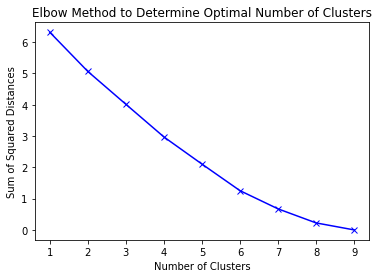

In [22]:
max_clusters = len(text)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)
    
# Determine the optimal number of clusters using the elbow method
sum_of_squared_distances = []
for num_clusters in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans = kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(range(1, max_clusters+1), sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

In [23]:
num_clusters = 7

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(X)

# Assign each sentence to a cluster
labels = kmeans.labels_

# Create a summary by selecting one sentence from each cluster
summary = []
for i in range(num_clusters):
    cluster_sentences = [text[j] for j in range(len(text)) if labels[j] == i]
    summary.append(cluster_sentences[0])

In [24]:
summary

['the health ministry has also urged eligible individuals to come forward and get vaccinated at the earliest.india has reported over 11 million cases of covid19 making it the secondworst affected country in the world after the united states.',
 'indias health ministry has announced that the countrys covid19 vaccination drive will now be expanded to include people over the age of 60 and those over 45 with comorbidities.',
 'however the pace of the vaccination drive has been slower than expected with concerns raised over vaccine hesitancy and logistical challenges.the expansion of the vaccination drive to include the elderly and those with comorbidities is a major step towards achieving herd immunity and controlling the spread of the virus in india.',
 'since then over 13 million doses have been administered across the country.',
 'the countrys daily case count has been declining in recent weeks but experts have warned that the pandemic is far from over and that precautions need to be ma

In [25]:
len(summary)

7

In [26]:
!pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import nltk
from nltk.translate.bleu_score import sentence_bleu

In [28]:
result = summary

In [29]:
def list_to_string(strings):
    """
    Converts a list of strings into a single string.
    :param strings: List of strings.
    :return: Single string.
    """
    return "".join(strings)

In [30]:
summary_text = list_to_string(result)

In [31]:
def text_to_word_list(text):
    return text.split()

In [32]:
predicted_summary = text_to_word_list(summary_text)

In [33]:
predicted_summary

['the',
 'health',
 'ministry',
 'has',
 'also',
 'urged',
 'eligible',
 'individuals',
 'to',
 'come',
 'forward',
 'and',
 'get',
 'vaccinated',
 'at',
 'the',
 'earliest.india',
 'has',
 'reported',
 'over',
 '11',
 'million',
 'cases',
 'of',
 'covid19',
 'making',
 'it',
 'the',
 'secondworst',
 'affected',
 'country',
 'in',
 'the',
 'world',
 'after',
 'the',
 'united',
 'states.indias',
 'health',
 'ministry',
 'has',
 'announced',
 'that',
 'the',
 'countrys',
 'covid19',
 'vaccination',
 'drive',
 'will',
 'now',
 'be',
 'expanded',
 'to',
 'include',
 'people',
 'over',
 'the',
 'age',
 'of',
 '60',
 'and',
 'those',
 'over',
 '45',
 'with',
 'comorbidities.however',
 'the',
 'pace',
 'of',
 'the',
 'vaccination',
 'drive',
 'has',
 'been',
 'slower',
 'than',
 'expected',
 'with',
 'concerns',
 'raised',
 'over',
 'vaccine',
 'hesitancy',
 'and',
 'logistical',
 'challenges.the',
 'expansion',
 'of',
 'the',
 'vaccination',
 'drive',
 'to',
 'include',
 'the',
 'elderly',
 

In [34]:
def text_to_sentence_list(text):
    import nltk
    nltk.download('punkt')
    from nltk.tokenize import sent_tokenize
    return [sentence.split() for sentence in sent_tokenize(text)]

In [35]:
reference_summary = text_to_sentence_list(article)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
reference_summary

[['indias',
  'health',
  'ministry',
  'has',
  'announced',
  'that',
  'the',
  'countrys',
  'covid19',
  'vaccination',
  'drive',
  'will',
  'now',
  'be',
  'expanded',
  'to',
  'include',
  'people',
  'over',
  'the',
  'age',
  'of',
  '60',
  'and',
  'those',
  'over',
  '45',
  'with',
  'comorbidities.'],
 ['the',
  'move',
  'is',
  'expected',
  'to',
  'cover',
  'an',
  'additional',
  '270',
  'million',
  'people',
  'making',
  'it',
  'one',
  'of',
  'the',
  'largest',
  'vaccination',
  'drives',
  'in',
  'the',
  'world.the',
  'decision',
  'was',
  'taken',
  'after',
  'a',
  'meeting',
  'of',
  'the',
  'national',
  'expert',
  'group',
  'on',
  'vaccine',
  'administration',
  'for',
  'covid19',
  'negvac',
  'which',
  'recommended',
  'the',
  'expansion',
  'of',
  'the',
  'vaccination',
  'program.'],
 ['the',
  'negvac',
  'also',
  'suggested',
  'that',
  'private',
  'hospitals',
  'may',
  'be',
  'allowed',
  'to',
  'administer',
  'the

In [37]:
score = sentence_bleu(reference_summary, predicted_summary)

In [39]:
print("BLEU Score: {:.3f}".format(score))

BLEU Score: 0.824
